In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from organs.gi import giInit, GI
from organs.index import Index

p = giInit()

45


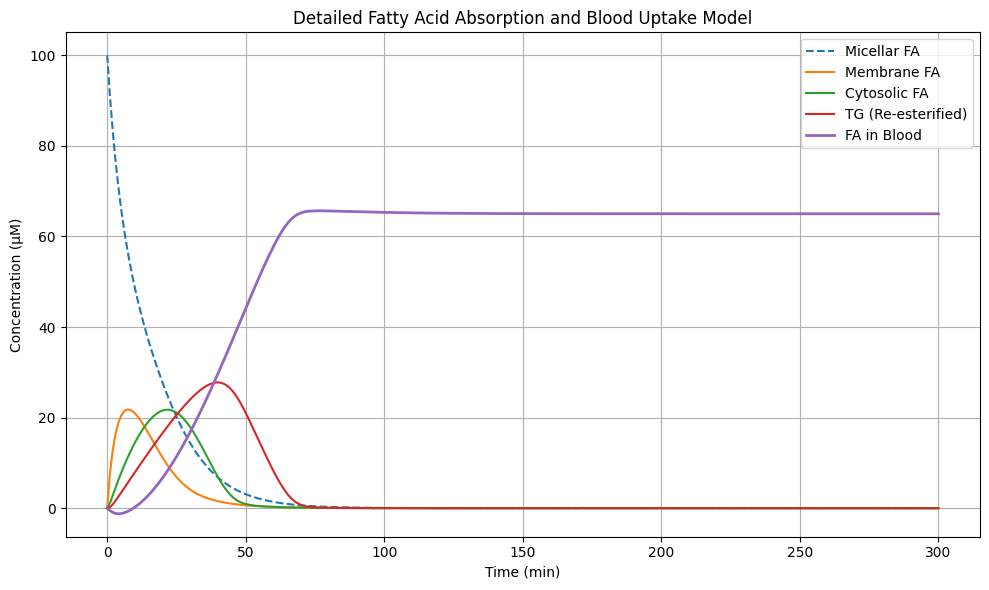

In [2]:
n = len(Index)
print(n)
y0 = np.zeros(n)

y0[Index.gut_glucose] = 50 #mM
y0[Index.plasma_glucose] = 5 #mM
y0[Index.gut_fructose] = 30 #mM
y0[Index.plasma_fructose] = 3 #mM
y0[Index.micellar_fattyacid] = 100 

# Simulate
t_span = (0, 300)
t_eval = np.linspace(*t_span, 300)

solution = solve_ivp(fun=lambda t, y: GI(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')
t = solution.t
y = solution.y
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, y[Index.micellar_fattyacid], label='Micellar FA', linestyle='dashed')
plt.plot(t, y[Index.membrane_fattyacid], label='Membrane FA')
plt.plot(t, y[Index.cytosol_fattyacid], label='Cytosolic FA')
plt.plot(t, y[Index.cytosol_TAG], label='TG (Re-esterified)')
plt.plot(t, y[Index.plasma_fattyacid], label='FA in Blood', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (µM)')
plt.title('Detailed Fatty Acid Absorption and Blood Uptake Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



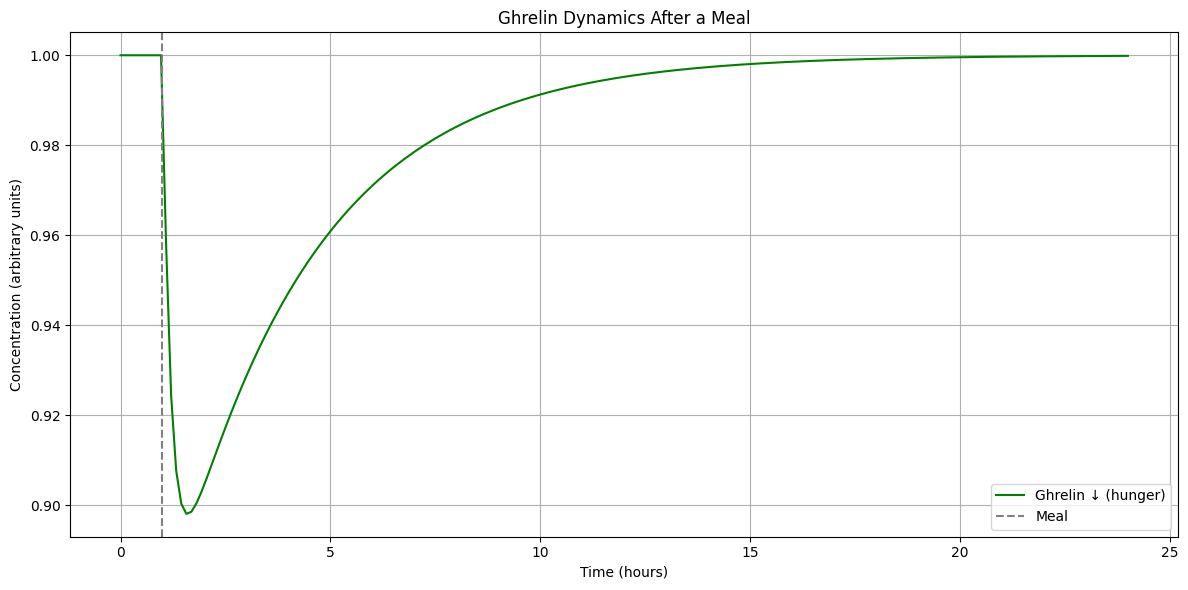

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#ghrelin = hunger hormone, drops after a meal

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GHRELIN: hunger hormone, drops after meal
def ghrelin_model(H, t):
    baseline = 1.0
    k_elim = 0.3
    
    # Apply meal effect only for times after t_meal (check if the current time `t` >= `t_meal`)
    meal_effect = -0.61 * np.exp(-5 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of ghrelin
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt


# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    ghrelin = y[0]
    # Call the ghrelin model to calculate the rate of change
    return [ghrelin_model(ghrelin, t)]


# Initial value for Ghrelin (baseline)
y0 = [1.0]  # Initial concentration for ghrelin

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get ghrelin values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='Ghrelin ↓ (hunger)', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Ghrelin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


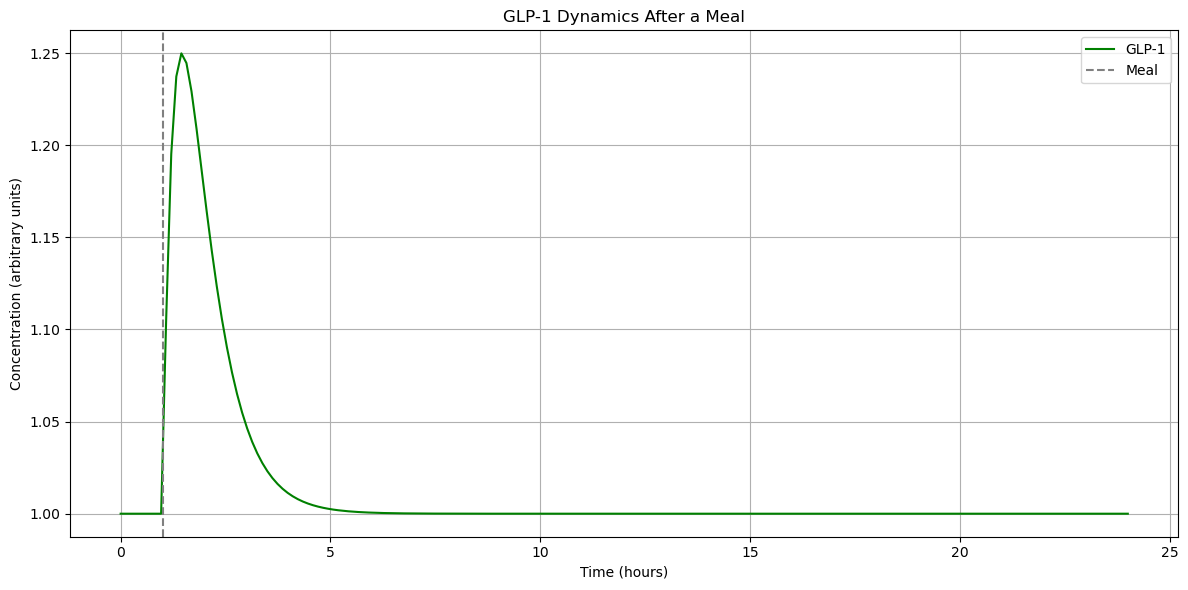

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# produced in intestines and enhances insulin secretion,inhibits glucagon release, slows gastric emptying, promotes feelings of fullness
# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GlP-1: hunger hormone, drops after meal
def glp1_model(H, t):
    baseline = 1
    k_elim = 1.5
    meal_effect = 1.5 * np.exp(-3 * (t - t_meal)) if t >= t_meal else 0
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt
#1.5 is a guess, have not found how much it increases yet

# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    glp1 = y[0]
    # Call the GlP-1 model to calculate the rate of change
    return [glp1_model(glp1, t)]


# Initial value for GlP-1 (baseline)
y0 = [1.0]  # Initial concentration for GlP-1

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get GlP-1 values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='GLP-1', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('GLP-1 Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


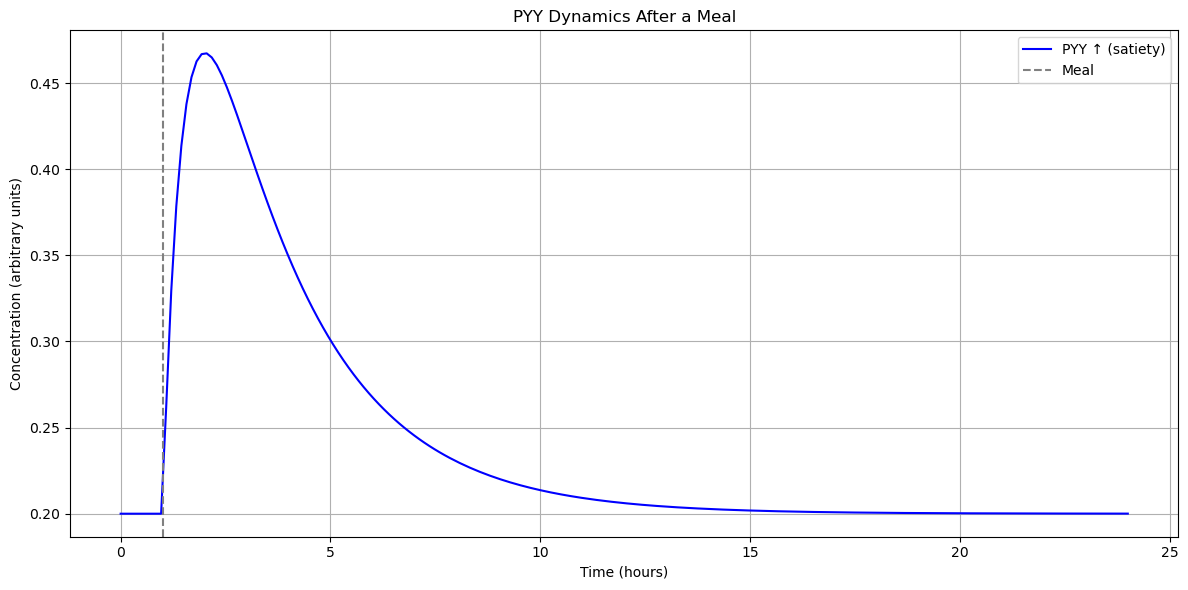

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)

# PYY: satiety hormone, increases after meal
def pyy_model(P, t):
    baseline = 0.2
    k_decay = 0.4  # Decay rate back to baseline after meal
    
    # Meal triggers a spike in PYY after t_meal
    meal_effect = 0.8 * np.exp(-2 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of PYY
    dPdt = -k_decay * (P - baseline) + meal_effect
    return dPdt

# Combined ODE system with only PYY
def hormone_system(y, t):
    pyy = y[0]
    return [pyy_model(pyy, t)]

# Initial value for PYY (baseline)
y0 = [0.2]  # Initial concentration for PYY

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
pyy = sol.flatten()

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, pyy, label='PYY ↑ (satiety)', color='blue')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('PYY Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

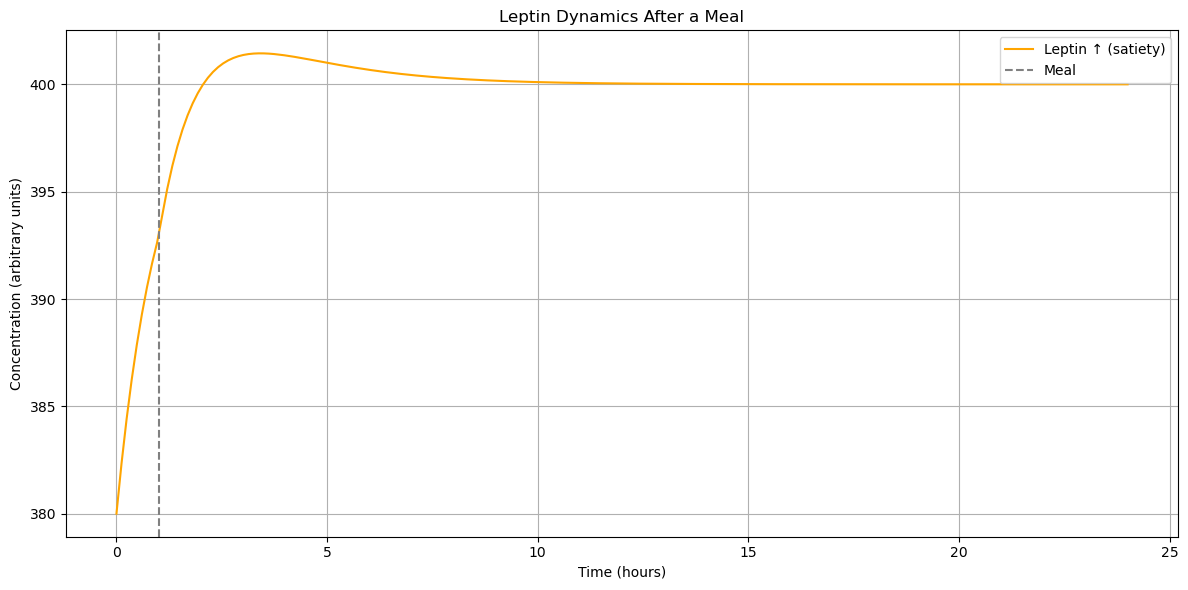

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 24 hours)
t = np.linspace(0, 24, 200)

# LEPTIN: satiety hormone, rises slowly after meal
def leptin_model(L, t):
    baseline = 400
    k_elim = np.log(2) / (40.2 / 60)  # Convert 40.2 min half-life to per hour
    
    # Slow meal-induced rise in leptin after the meal
    meal_effect = 5.0 * np.exp(-0.5 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of leptin
    dLdt = -k_elim * (L - baseline) + meal_effect
    return dLdt

# Combined ODE system with only Leptin
def hormone_system(y, t):
    leptin = y[0]
    return [leptin_model(leptin, t)]

# Initial value for Leptin
y0 = [380]  # Slightly below baseline

# Solve the system
sol = odeint(hormone_system, y0, t)
leptin = sol.flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, leptin, label='Leptin ↑ (satiety)', color='orange')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Leptin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

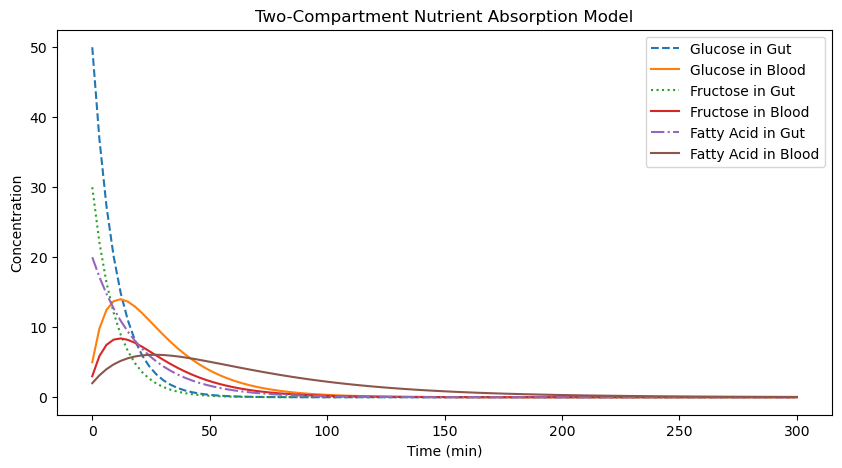

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FructoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FattyAcidModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut) / params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood)) / params.V_blood
    return [dG_gut_dt, dG_blood_dt]

def fructose_two_compartment(t, y, params):
    F_gut, F_blood = y
    dF_gut_dt = -(params.k_abs * F_gut * params.V_gut) / params.V_gut
    dF_blood_dt = ((params.k_abs * F_gut * params.V_gut) - (params.k_clear * F_blood * params.V_blood)) / params.V_blood
    return [dF_gut_dt, dF_blood_dt]

def fatty_acid_two_compartment(t, y, params):
    FA_gut, FA_blood = y
    dFA_gut_dt = -(params.k_abs * FA_gut * params.V_gut) / params.V_gut
    dFA_blood_dt = ((params.k_abs * FA_gut * params.V_gut) - (params.k_clear * FA_blood * params.V_blood)) / params.V_blood
    return [dFA_gut_dt, dFA_blood_dt]

# Define parameters
glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fructose_params = FructoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fatty_acid_params = FattyAcidModelParams(k_abs=0.05, k_clear=0.02, V_gut=1.25, V_blood=2.75)

# Initial conditions
glucose_y0 = [50, 5]  # Glucose in gut and blood (mmol)
fructose_y0 = [30, 3]  # Fructose in gut and blood (mmol)
fatty_acid_y0 = [20, 2]  # Fatty acid in gut and blood (mmol)

# Time span for simulation
t_span = (0, 300)
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(fructose_params,))
fatty_acid_solution = solve_ivp(fatty_acid_two_compartment, t_span, fatty_acid_y0, t_eval=t_eval, args=(fatty_acid_params,))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')
plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[0], label='Fatty Acid in Gut', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[1], label='Fatty Acid in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Two-Compartment Nutrient Absorption Model')
plt.legend()
plt.show()
